The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

1)The most commonly awarded gender and birth country:United States of America, Male


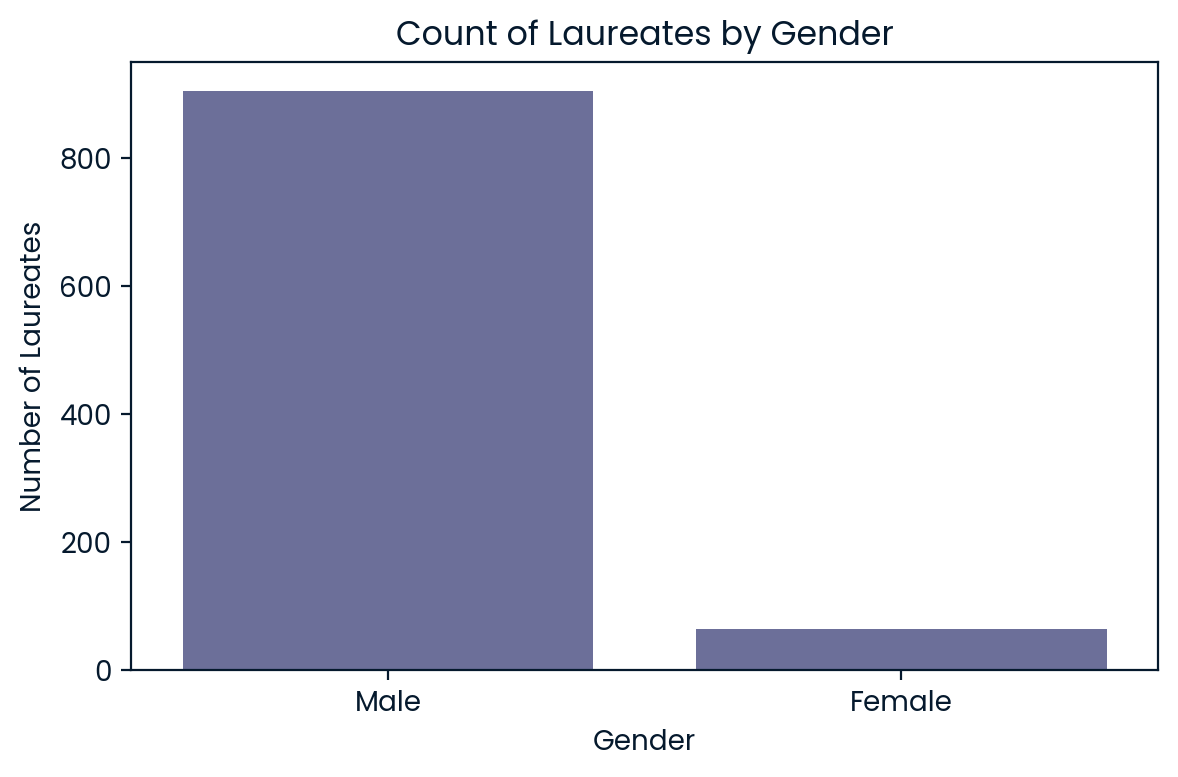

2)The decade whith the highest ratio of US-born Nobel Prize winners to total winners in all categories is: 2000


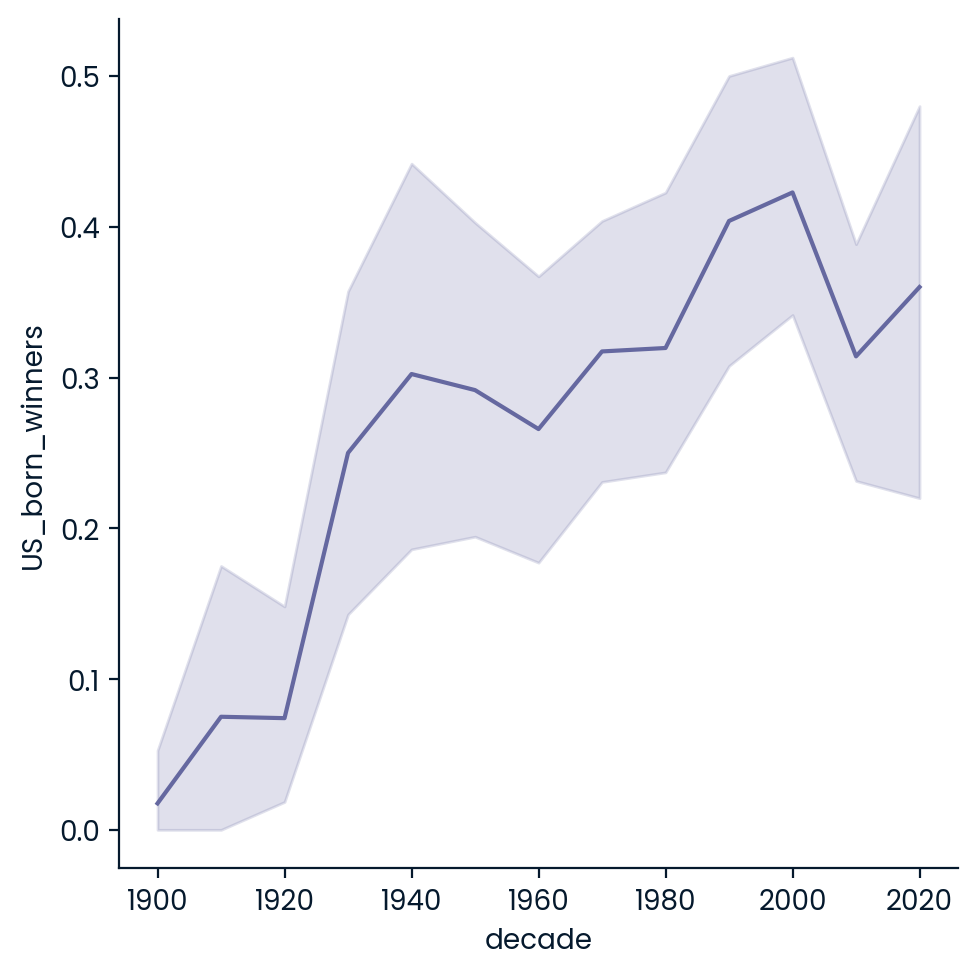

3)The decade with the highest proportion of female laureates was 2020 in the Literature category.


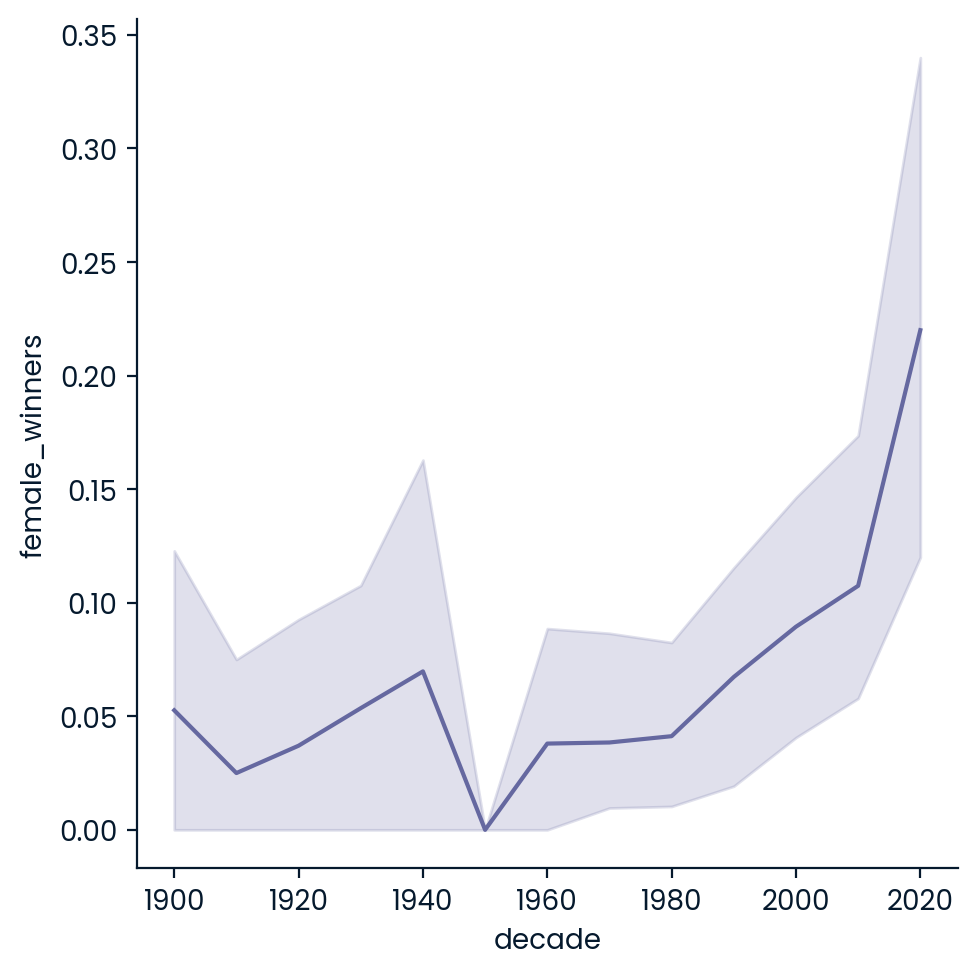

4)The first woman to win a Nobel Prize was Marie Curie, née Sklodowska in the category of Physics.
5)Individuals or organizations that have won more than one Nobel Prize throughout the years:
- Comité international de la Croix Rouge (International Committee of the Red Cross): 3 prizes
- Linus Carl Pauling: 2 prizes
- John Bardeen: 2 prizes
- Frederick Sanger: 2 prizes
- Marie Curie, née Sklodowska: 2 prizes
- Office of the United Nations High Commissioner for Refugees (UNHCR): 2 prizes


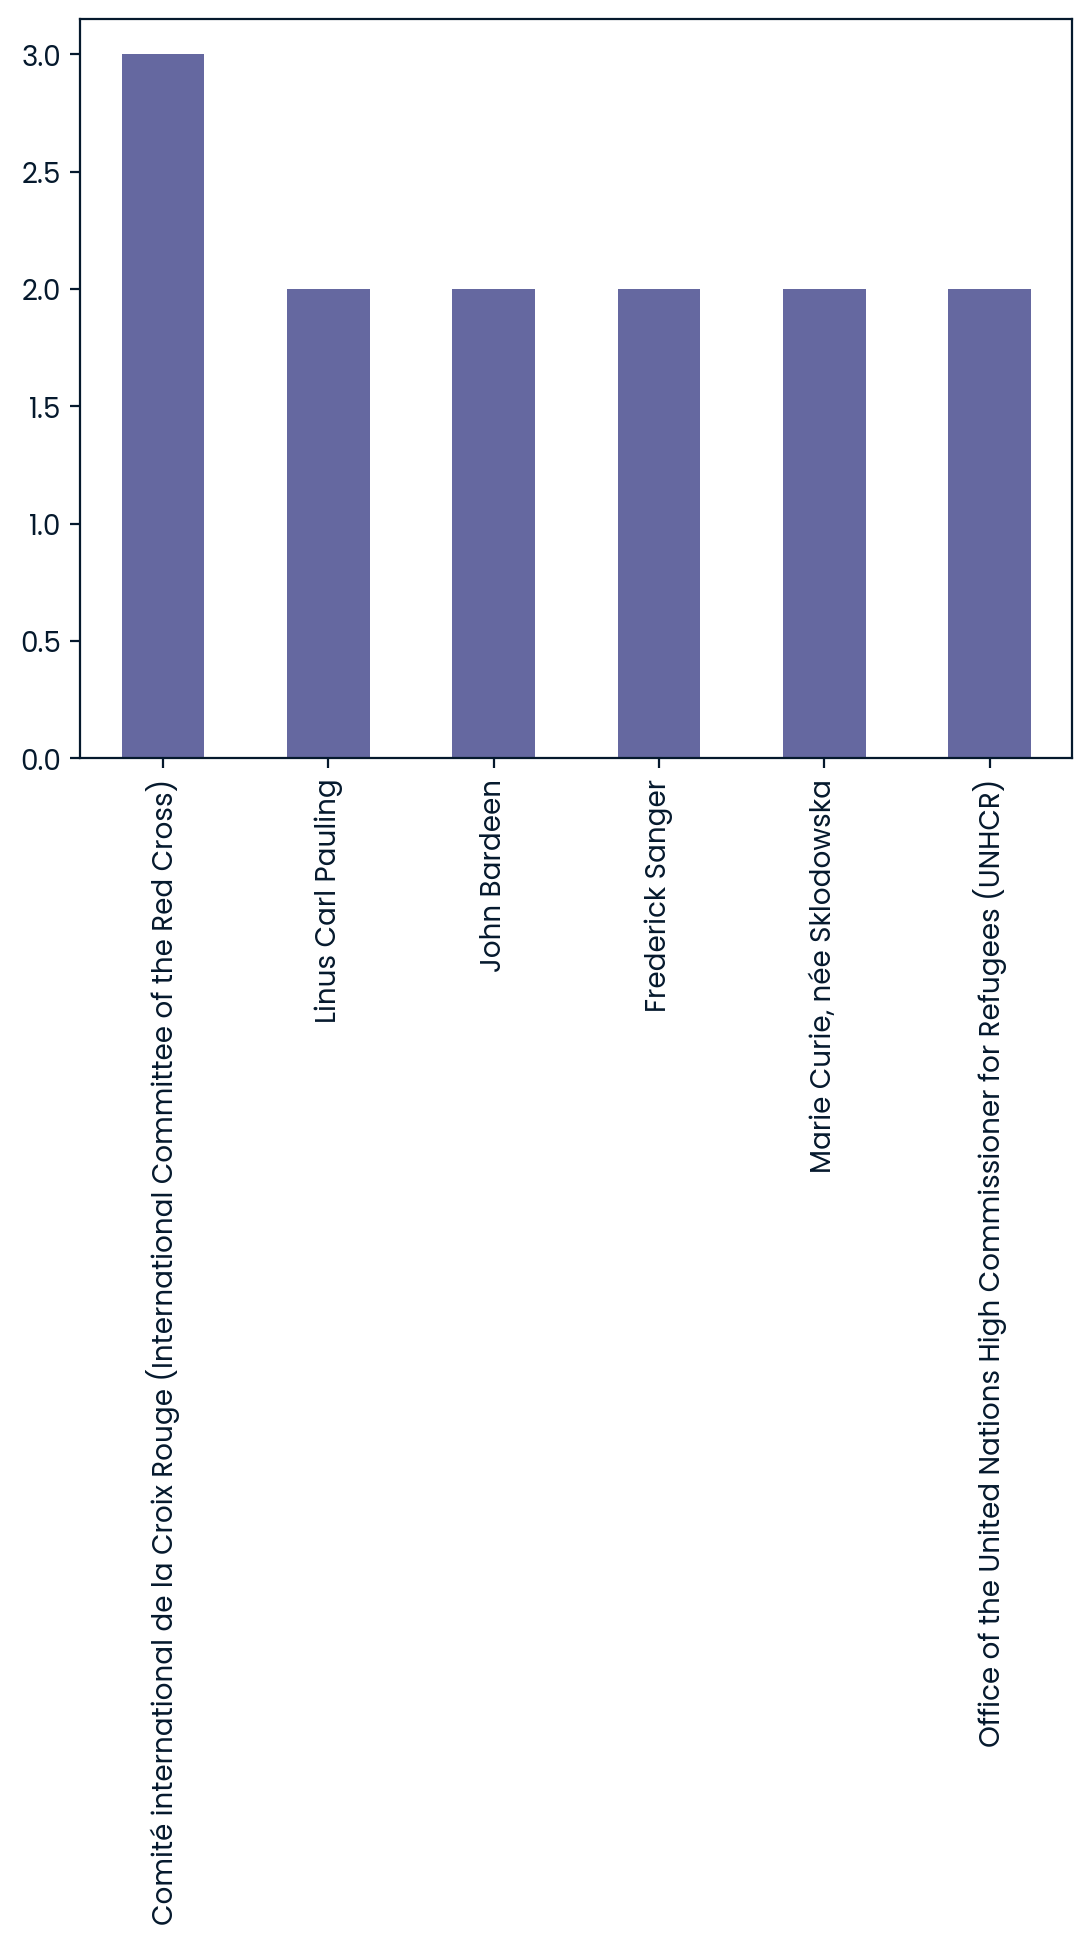

In [3]:
# Loading in required libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np



df = pd.read_csv("data/nobel.csv")


#1 What is the most commonly awarded gender and birth country?
#Store your answers as string variables top_gender and top_country.
top_gender= df["sex"].mode()[0] # use mode() to serch the common  gender and using 0 to indicate the value that im interested in.
top_country= df['birth_country'].mode()[0]

print(f"1)The most commonly awarded gender and birth country:{top_country}, {top_gender}")

#grafic:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sex')
plt.title('Count of Laureates by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Laureates')
plt.tight_layout()
plt.show()


#2 Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
df["US_born_winners"]= df["birth_country"]== 'United States of America'

df["decade"]= (np.floor(df["year"]/10)*10).astype(int) # np.floor se usa para redondear al numero hacia abajo mas cercano

ratio_of_USwinners= df.groupby("decade", as_index=False)["US_born_winners"].mean()

max_decade_usa= ratio_of_USwinners[ratio_of_USwinners["US_born_winners"] == ratio_of_USwinners["US_born_winners"].max()]['decade'].values[0]

print(f'2)The decade whith the highest ratio of US-born Nobel Prize winners to total winners in all categories is: {max_decade_usa}')

#Grafic:
ax1= sns.relplot(x="decade", y="US_born_winners", kind="line", data= df)

plt.show()


#3 Which decade and Nobel Prize category combination had the highest proportion of female laureates?

df["female_winners"]= df["sex"]== 'Female'

ratio_of_female_winners= df.groupby(["decade", 'category'], as_index=False)["female_winners"].mean()

max_row = ratio_of_female_winners.loc[ratio_of_female_winners['female_winners'].idxmax()]

best_decade = int(max_row['decade'])

best_category = max_row['category']

print(f"3)The decade with the highest proportion of female laureates was {best_decade} in the {best_category} category.")

#Grafic

ax2= sns.relplot(x='decade', y="female_winners", kind="line", data= df)

plt.show()


#4 Who was the first woman to receive a Nobel Prize, and in what category?
new_df= df[df["female_winners"]]

min_row = new_df[new_df['year'] == new_df['year'].min()]

first_woman_name=  min_row['full_name'].values[0]

first_woman_category= new_df['category'].values[0]

print(f"4)The first woman to win a Nobel Prize was {first_woman_name} in the category of {first_woman_category}.")

#5 Which individuals or organizations have won more than one Nobel Prize throughout the years?


repeat_counts = df['full_name'].value_counts()
repeat_counts = repeat_counts[repeat_counts > 1]
repeat_list = list(repeat_counts.index)
print("5)Individuals or organizations that have won more than one Nobel Prize throughout the years:")
for name, count in repeat_counts.items():
    print(f"- {name}: {count} prizes")# it creates duplas

#Grafic
plt.figure()
repeat_counts.plot(kind='bar')
plt.show()